Data pre-processing
Removing noise (If required).
Changing the size of the images (If required).
Normalizing the pixels values. 
Encoding the target variable.

Exploratory Data Analysis
Converting images pixels to other formats (RGB and HSV if required)
Use appropriate Edge Detectors (If required)
Insights from EDA

Analytical Approach
Mention the alternative analytical approaches that you may see fit to be applied to the problem

In [121]:
pip install scipy

  Using cached numpy-1.22.4-cp39-cp39-macosx_10_15_x86_64.whl (17.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.2
    Uninstalling numpy-1.26.2:
      Successfully uninstalled numpy-1.26.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.22.4 which is incompatible.
tensorflow 2.15.0 requires numpy<2.0.0,>=1.23.5, but you have numpy 1.22.4 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [122]:
pip install tensorflow

  Using cached numpy-1.26.2-cp39-cp39-macosx_10_9_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.2-cp39-cp39-macosx_10_9_x86_64.whl (20.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.26.2 which is incompatible.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.26.2 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import cv2

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

2023-12-09 15:21:03.368496: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [9]:
labels_dict = {
    'Happy': 0,
    'Not_Happy': 1
}

Load and Normalize data

# Normalizing image resize 
test_directory = "/Users/geeta-mit/Desktop/capstone-project/milestone-1/content/Dataset/Training/Test/"
classes=["Happy","Not_Happy"]
test_X,test_y ,test_resize_X,test_np_resize_X= [], [],[],[]
test_cat=[]

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(48, 48),
  layers.Rescaling(1./255)
])

for category in classes:
  print(category)
  path= os.path.join(directory,category)
  for img_name in os.listdir(path):
    cat.append(category)
    img_path.append(img_name)
    y.append(labels_dict[category])
    img=cv2.imread(os.path.join(path,img_name))
    resize_img = resize_and_rescale(img)
    X.append(img)
    resize_X.append(resize_img)
    np_resize_X.append (np.array(resize_img))


In [146]:
# Normalizing image resize 
directory = "/Users/geeta-mit/Desktop/capstone-project/milestone-1/content/Dataset/Training/Train/"
classes=["Happy","Not_Happy"]
X,y ,resize_X,np_resize_X= [], [],[],[]
cat=[]

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(48, 48),
  layers.Rescaling(1./255)
])

for category in classes:
  print(category)
  path= os.path.join(directory,category)
  for img_name in os.listdir(path):
    cat.append(category)
    img_path.append(img_name)
    y.append(labels_dict[category])
    img=cv2.imread(os.path.join(path,img_name))
    resize_img = resize_and_rescale(img)
    X.append(img)
    resize_X.append(resize_img)
    np_resize_X.append (np.array(resize_img))


Happy
Not_Happy


In [147]:
import pandas as pd
dataFrame = pd.DataFrame()
dataFrame['img'] = X
dataFrame['cat'] = cat
dataFrame['class'] = y
dataFrame['normalize_img'] = resize_X
dataFrame['np_normalize_img'] = np_resize_X
dataFrame = dataFrame.sample(frac=1).reset_index(drop=True)


dataFrame.head()

,img,cat,class,normalize_img,np_normalize_img
0,"[[[255, 255, 255], [169, 169, 169], [82, 82, 8...",Not_Happy,1,"(((tf.Tensor(1.0, shape=(), dtype=float32), tf...","[[[1.0, 1.0, 1.0], [0.6627451, 0.6627451, 0.66..."
1,"[[[252, 252, 252], [240, 240, 240], [220, 220,...",Happy,0,"(((tf.Tensor(0.98823535, shape=(), dtype=float...","[[[0.98823535, 0.98823535, 0.98823535], [0.941..."
2,"[[[196, 196, 196], [198, 198, 198], [204, 204,...",Not_Happy,1,"(((tf.Tensor(0.7686275, shape=(), dtype=float3...","[[[0.7686275, 0.7686275, 0.7686275], [0.776470..."
3,"[[[224, 224, 224], [227, 227, 227], [227, 227,...",Not_Happy,1,"(((tf.Tensor(0.87843144, shape=(), dtype=float...","[[[0.87843144, 0.87843144, 0.87843144], [0.890..."
4,"[[[207, 207, 207], [157, 157, 157], [231, 231,...",Happy,0,"(((tf.Tensor(0.8117648, shape=(), dtype=float3...","[[[0.8117648, 0.8117648, 0.8117648], [0.615686..."


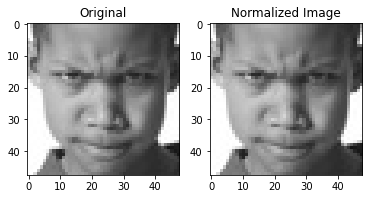

In [148]:
# Assuming 'dataFrame' is your DataFrame
plt.subplot(121), plt.imshow(cv2.cvtColor(dataFrame['img'][0], cv2.COLOR_BGR2RGB)), plt.title('Original')

# Ensure 'normalize_img' contains valid numpy arrays
normalized_img = dataFrame['np_normalize_img'][0]

# If 'normalize_img' is a single-channel image, reshape it to a 3D array
if len(normalized_img.shape) == 2:
    normalized_img = cv2.cvtColor(normalized_img, cv2.COLOR_GRAY2RGB)

plt.subplot(122), plt.imshow(normalized_img), plt.title('Normalized Image')
plt.show()


In [149]:
# Select ratio
ratio = 0.80
 
total_rows = dataFrame.shape[0]
train_size = int(total_rows*ratio)
 
# Split data into test and train
train_ds = dataFrame[0:train_size]
validation_ds = dataFrame[train_size:]
print("train DF :"+ str(train_ds.shape[0]))
print("Validation DF :"+ str(validation_ds.shape[0]))

train DF :3217
Validation DF :805


Argumentation Techniques can be applied to Training data to improve model performance
Flip and Rotation  help model to perform well in real life images orientation which can be upside down.
Bluring can reduce noise and focus on key feature

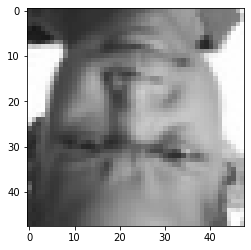

In [150]:
# Define data augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

# Perform data augmentation
augmented_image = data_augmentation(dataFrame['np_normalize_img'][0])


# Display the augmented image
plt.imshow(augmented_image)
plt.show()

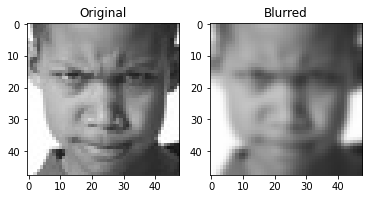

In [151]:
normalized_img = dataFrame['np_normalize_img'][0]
# Apply Gaussian Blur
blurred_img = cv2.GaussianBlur(normalized_img, (5, 5), 0)

# Display original and blurred images
plt.subplot(121), plt.imshow(cv2.cvtColor(normalized_img, cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(122), plt.imshow(cv2.cvtColor(blurred_img, cv2.COLOR_BGR2RGB)), plt.title('Blurred')
plt.show()

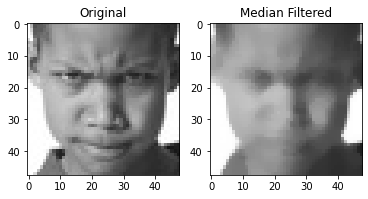

In [152]:
# Apply Median Filter
median_img = cv2.medianBlur(normalized_img, 5)

# Display original and median-filtered images
plt.subplot(121), plt.imshow(cv2.cvtColor(normalized_img, cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(122), plt.imshow(cv2.cvtColor(median_img, cv2.COLOR_BGR2RGB)), plt.title('Median Filtered')
plt.show()

different color spaces may emphasize different features in an image. For example, the HSV color space separates intensity (brightness) from color information, making it easier to identify objects based on their color regardless of lighting conditions.

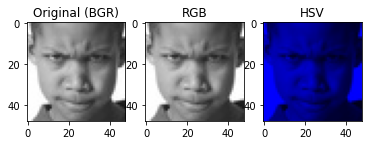

In [153]:
# Convert BGR (OpenCV default) to RGB
rgb_img = cv2.cvtColor(normalized_img, cv2.COLOR_BGR2RGB)

# Convert BGR to HSV
hsv_img = cv2.cvtColor(normalized_img, cv2.COLOR_BGR2HSV)

# Display original, RGB, and HSV images
plt.subplot(131), plt.imshow(cv2.cvtColor(normalized_img, cv2.COLOR_BGR2RGB)), plt.title('Original (BGR)')
plt.subplot(132), plt.imshow(rgb_img), plt.title('RGB')
plt.subplot(133), plt.imshow(hsv_img), plt.title('HSV')
plt.show()

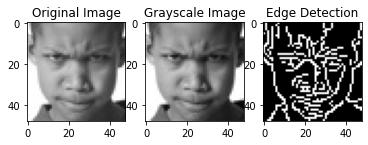

In [154]:
gray_image = cv2.cvtColor(dataFrame['img'][0], cv2.COLOR_BGR2GRAY)

blurred_img = cv2.convertScaleAbs(gray_image)

# Use the Canny edge detector
edges = cv2.Canny(gray_image, 50, 150)

# Display the original image, grayscale image, and edges
plt.subplot(131), plt.imshow(cv2.cvtColor(dataFrame['img'][0], cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(132), plt.imshow(gray_image, cmap='gray'), plt.title('Grayscale Image')
plt.subplot(133), plt.imshow(edges, cmap='gray'), plt.title('Edge Detection')
plt.show()

In [163]:
from tensorflow.keras import layers, models
data_X = np.array(dataFrame['normalize_img'].tolist())
data_y = np.array(dataFrame['class'].tolist())


num_classes = 2

model = models.Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Training the model
model.fit(data_X, data_y, epochs=30)

Epoch 1/30
126/126 [==============================] - 7s 42ms/step - loss: 0.6915 - accuracy: 0.5497
Epoch 2/30
126/126 [==============================] - 5s 42ms/step - loss: 0.5773 - accuracy: 0.7029
Epoch 3/30
126/126 [==============================] - 5s 44ms/step - loss: 0.4490 - accuracy: 0.7904
Epoch 4/30
126/126 [==============================] - 5s 42ms/step - loss: 0.3966 - accuracy: 0.8120
Epoch 5/30
126/126 [==============================] - 5s 41ms/step - loss: 0.3468 - accuracy: 0.8416
Epoch 6/30
126/126 [==============================] - 5s 43ms/step - loss: 0.3164 - accuracy: 0.8660
Epoch 7/30
126/126 [==============================] - 5s 41ms/step - loss: 0.2754 - accuracy: 0.8841
Epoch 8/30
126/126 [==============================] - 5s 42ms/step - loss: 0.2551 - accuracy: 0.8928
Epoch 9/30
126/126 [==============================] - 6s 47ms/step - loss: 0.2090 - accuracy: 0.9140
Epoch 10/30
126/126 [==============================] - 6s 47ms/step - loss: 0.1812 - accura